In [1]:
import geopandas as gpd

# Lebensweltlich orientierte Räume (LOR) in Berlin seit 01.01.2021
- https://www.berlin.de/sen/sbw/stadtdaten/stadtwissen/sozialraumorientierte-planungsgrundlagen/lebensweltlich-orientierte-raeume/
- Geodata from https://www.berlin.de/sen/sbw/_assets/stadtdaten/stadtwissen/lebensweltlich-orientierte-raeume/lor_shp_2021.7z?ts=1705017669
- Dokumentation zur Modifikation der LOR 2020  https://www.berlin.de/sen/sbw/_assets/stadtdaten/stadtwissen/lebensweltlich-orientierte-raeume/dokumentation_zur_modifikation_lor_2020.pdf?ts=1705017669
- structure
  - Planungsräumen (PLR) als unterste Ebene, 542 Räume,
  - Bezirksregionen (BZR) als mittlere Ebene, 143 Räume,
  - Prognoseräumen (PGR) als obere Ebene, 58 Räume

Numbering/id scheme is (page 22 in Dokumentation zur Modifikation...) 
![id scheme](lor_id_scheme.JPG)

### Prognoseräume (PGR)
obere Ebene, 58 Räume

PGR_ID        object
PGR_NAME      object
geometry    geometry
dtype: object

,PGR_ID,PGR_NAME,geometry
0,0840,Buckow Nord/Rudow,"POLYGON ((394743.507 5810746.228, 394742.935 5..."
1,0830,Gropiusstadt,"POLYGON ((394298.846 5809626.409, 394372.388 5..."
2,0820,Britz/Buckow,"POLYGON ((392702.100 5812976.802, 392718.990 5..."
3,0810,Neukölln,"POLYGON ((392751.081 5814021.120, 392747.184 5..."
4,0220,Kreuzberg Süd,"POLYGON ((389818.697 5818088.087, 389822.621 5..."


(58, 3)

174

<Axes: >

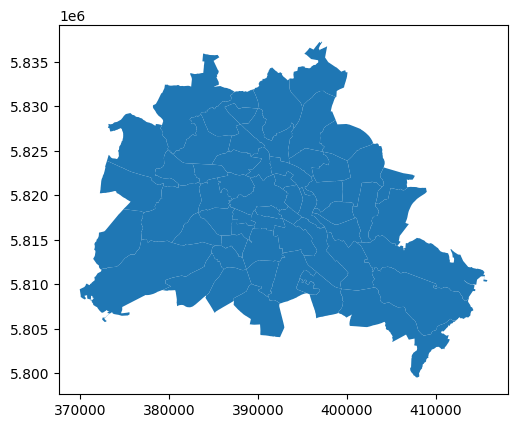

In [2]:
pgr = gpd.read_file("lor_shp_2021/lor_pgr.shp")
display(pgr.dtypes, pgr.head(), pgr.shape, pgr.size)

# # rename geometry column to geom
# pgr = pgr.rename(columns={"geometry": "geom"})
# # set geom column as main geometry
# pgr.set_geometry("geom", inplace=True)

pgr.plot()

In [3]:
# By Bezirk: First two digits of id correspond to Bezirk
# 01 (Mitte), ... 12 (Reinickendorf)
pgr[pgr["PGR_ID"].str.startswith("12")]

,PGR_ID,PGR_NAME,geometry
32,1240,Grüner Norden,"POLYGON ((386578.107 5830544.954, 386574.629 5..."
33,1220,Tegel,"POLYGON ((384407.508 5827220.241, 384408.487 5..."
34,1210,Reinickendorf Ost,"POLYGON ((390771.475 5825398.958, 390769.385 5..."
35,1250,Wittenau/Borsigwalde,"POLYGON ((384088.202 5829403.353, 384090.234 5..."
36,1260,Märkisches Viertel,"POLYGON ((386412.100 5829705.813, 386413.635 5..."


### Bezirksregionen (BZR)
mittlere Ebene, 143 Räume

BZR_ID        object
BZR_NAME      object
geometry    geometry
dtype: object

,BZR_ID,BZR_NAME,geometry
0,084012,Rudow,"POLYGON ((396597.490 5811370.953, 396601.640 5..."
1,083010,Gropiusstadt Ost,"POLYGON ((396188.572 5810213.427, 396191.009 5..."
2,083009,Gropiusstadt West,"POLYGON ((394298.846 5809626.409, 394372.388 5..."
3,082008,Buckow,"POLYGON ((392224.426 5809260.778, 392271.519 5..."
4,082007,Britz,"POLYGON ((392224.426 5809260.778, 392224.270 5..."


(143, 3)

<Axes: >

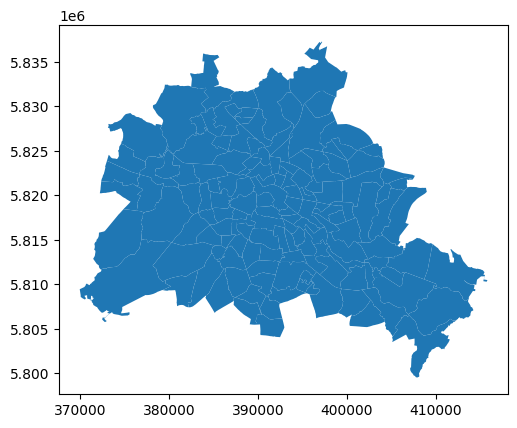

In [4]:
bzr = gpd.read_file("lor_shp_2021/lor_bzr.shp")
display(bzr.dtypes, bzr.head(), bzr.shape)
bzr.plot()

In [5]:
# Extract and add PGR_ID column by taking the first 4 characters of
# the BZR_ID column
bzr["PGR_ID"] = bzr["BZR_ID"].str[:4]

# Check if all PGR_IDs are equal to an entry in pgr's PGR_ID column
if not pgr["PGR_ID"].isin(bzr["PGR_ID"]).all():
    raise ValueError(f"Not all PGR_IDs are in the pgr dataframe. "
                     f"Something went wrong")

# Add column with PGR_NAME
bzr = bzr.merge(pgr[["PGR_ID", "PGR_NAME"]], on="PGR_ID")

bzr.head()


,BZR_ID,BZR_NAME,geometry,PGR_ID,PGR_NAME
0,084012,Rudow,"POLYGON ((396597.490 5811370.953, 396601.640 5...",0840,Buckow Nord/Rudow
1,084011,Buckow Nord,"POLYGON ((395100.658 5811409.938, 395121.008 5...",0840,Buckow Nord/Rudow
2,083010,Gropiusstadt Ost,"POLYGON ((396188.572 5810213.427, 396191.009 5...",0830,Gropiusstadt
3,083009,Gropiusstadt West,"POLYGON ((394298.846 5809626.409, 394372.388 5...",0830,Gropiusstadt
4,082008,Buckow,"POLYGON ((392224.426 5809260.778, 392271.519 5...",0820,Britz/Buckow


### Planungsräume (PLR)
unterste Ebene, 542 Räume

PLR_ID        object
PLR_NAME      object
geometry    geometry
dtype: object

,PLR_ID,PLR_NAME,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."


(542, 3)

<Axes: >

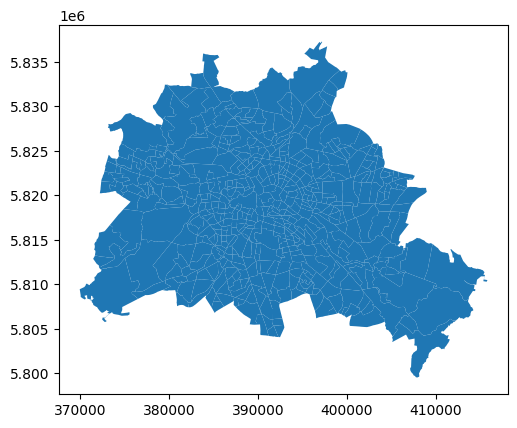

In [10]:
plr = gpd.read_file("lor_shp_2021/lor_plr.shp")
display(plr.dtypes, plr.head(), plr.shape)
plr.plot()